Training data folders: ['Cat', 'Dog']
Testing data folders: ['Cat', 'Dog']
Model Accuracy: 0.46

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.62      0.53        50
           1       0.44      0.30      0.36        50

    accuracy                           0.46       100
   macro avg       0.46      0.46      0.45       100
weighted avg       0.46      0.46      0.45       100



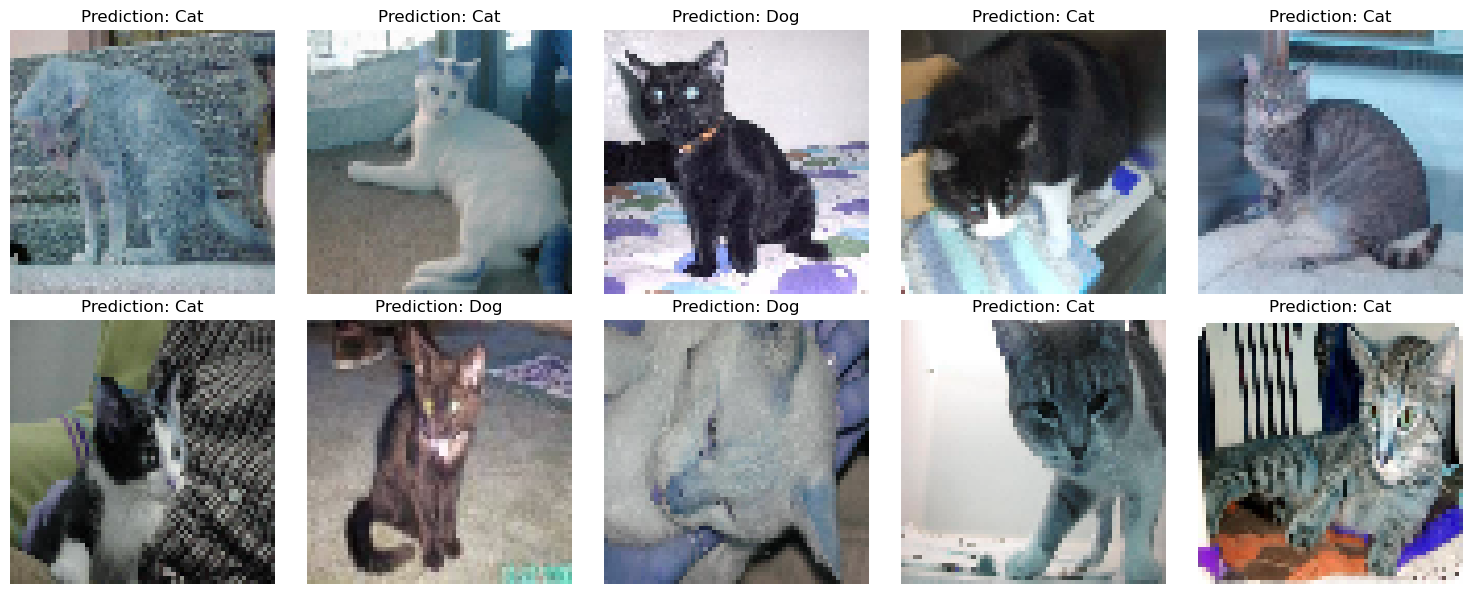

In [1]:
import numpy as np
import os
import cv2
import random
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Paths to the dataset directories
training_path = r'Train'  # Update with the correct training directory
testing_path = r'Test'    # Update with the correct testing directory

# Ensure the directories exist
if not os.path.isdir(training_path):
    raise FileNotFoundError(f"Training directory does not exist: {training_path}")
if not os.path.isdir(testing_path):
    raise FileNotFoundError(f"Testing directory does not exist: {testing_path}")

print("Training data folders:", os.listdir(training_path))
print("Testing data folders:", os.listdir(testing_path))


def load_data(data_dir, img_dims=(64, 64), limit_per_class=100):
    """
    Loads images and their labels from the specified directory.

    Args:
        data_dir (str): Path to the dataset directory.
        img_dims (tuple): Dimensions to resize the images (width, height).
        limit_per_class (int): Number of images to load per class.

    Returns:
        tuple: Numpy arrays of images and labels.
    """
    image_data, label_data = [], []
    for category in ['cat', 'dog']:
        category_dir = os.path.join(data_dir, category)
        if not os.path.exists(category_dir):
            raise FileNotFoundError(f"Subdirectory missing: {category_dir}")
        label = 0 if category == 'cat' else 1
        selected_files = random.sample(os.listdir(category_dir), limit_per_class)
        for file in selected_files:
            image_path = os.path.join(category_dir, file)
            img = cv2.imread(image_path)
            if img is not None:
                img = cv2.resize(img, img_dims)
                image_data.append(img)
                label_data.append(label)
    return np.array(image_data), np.array(label_data)


# Load subsets of training and testing data
train_data, train_targets = load_data(training_path, limit_per_class=50)
test_data, test_targets = load_data(testing_path, limit_per_class=50)

# Normalize image data to the range [0, 1]
train_data = train_data / 255.0
test_data = test_data / 255.0

# Reshape image data for SVM input
train_data_flat = train_data.reshape(train_data.shape[0], -1)
test_data_flat = test_data.reshape(test_data.shape[0], -1)

# Standardize feature data
scaler = StandardScaler()
train_features = scaler.fit_transform(train_data_flat)
test_features = scaler.transform(test_data_flat)

# Train an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(train_features, train_targets)

# Predict labels for the test dataset
predicted_labels = svm_model.predict(test_features)

# Evaluate model performance
model_accuracy = accuracy_score(test_targets, predicted_labels)
print(f"Model Accuracy: {model_accuracy:.2f}")
print("\nDetailed Classification Report:")
print(classification_report(test_targets, predicted_labels))

# Visualize test predictions
fig, axes_array = plt.subplots(2, 5, figsize=(15, 6))
axes_array = axes_array.ravel()

for index in range(10):
    axes_array[index].imshow(test_data[index])
    axes_array[index].set_title(f'Prediction: {"Dog" if predicted_labels[index] else "Cat"}')
    axes_array[index].axis('off')

plt.tight_layout()
plt.show()
